In [1]:
import collections
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib.colors import ListedColormap
from palettable.cartocolors.sequential import BluGrn_6
from palettable.colorbrewer.sequential import YlGnBu_8
from palettable.colorbrewer.sequential import YlGn_8
from palettable.cartocolors.sequential import PurpOr_6
from palettable.cmocean.sequential import Tempo_10
from palettable.cmocean.sequential import Matter_8
from palettable.cmocean.sequential import Dense_8
from palettable.cmocean.sequential import Deep_10
from palettable.wesanderson import Mendl_4

from ideotype.analysis import (identify_top_phenos,
                               prevalent_top_pheno,
                               rank_all_phenos)
from ideotype.data_process import read_data, agg_sims, process_sims

In [2]:
# Read in queried sim outputs
df_sims = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_yield.csv')
df_phys = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_phys.csv')
df_carbon = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_carbon.csv')
df_mass = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_mass.csv')
df_phenology = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_pheno.csv')
start_dates = [int(datetime.strptime(date, '%m/%d/%Y').strftime('%j')) for date in df_phenology.date_start]
df_phenology['jday'] = start_dates
df_leaves = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_leaves.csv')
df_waterdeficit = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_waterdeficit.csv')
df_waterdeficit_sum = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_waterdeficit_sum.csv')
df_waterpotential = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_waterpotential.csv')
#df_gseason_climate = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_gseason_climate.csv')

In [3]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_f2050.yml')

# Set up sites and phenotypes
sites_unsorted = list(set(df_sims.site))
sites = sites_unsorted.copy()
sites.sort()
phenos = list(set(df_sims.cvar))

In [9]:
# Function parameters
n_pheno = 100
w_yield = 1
w_disp = 1
run_name = 'f2050'

# Rank phenotypes
df_rankings, phenos_ranked = rank_all_phenos(run_name, n_pheno, w_yield, w_disp)

In [10]:
# Prep data
df = df_matured
groups = ['cvar', 'site']
how = 'mean'
sim = 'dm_ear'

mx_mean = agg_sims(df, groups, how, sim)
df_yield_means = pd.DataFrame(mx_mean)

# Sort data based on mean yield value
df_yield_means['mean'] = df_yield_means.mean(axis=1)

# Rank
phenos_ranked_by_yield = list(df_yield_means.sort_values(by=['mean'], axis=0, ascending=False).index)

In [25]:
df_gseason_climate = pd.read_csv('/home/disk/eos8/ach315/ideotype/ideotype/data/sims/sims_f2050_gseason_climate.csv')

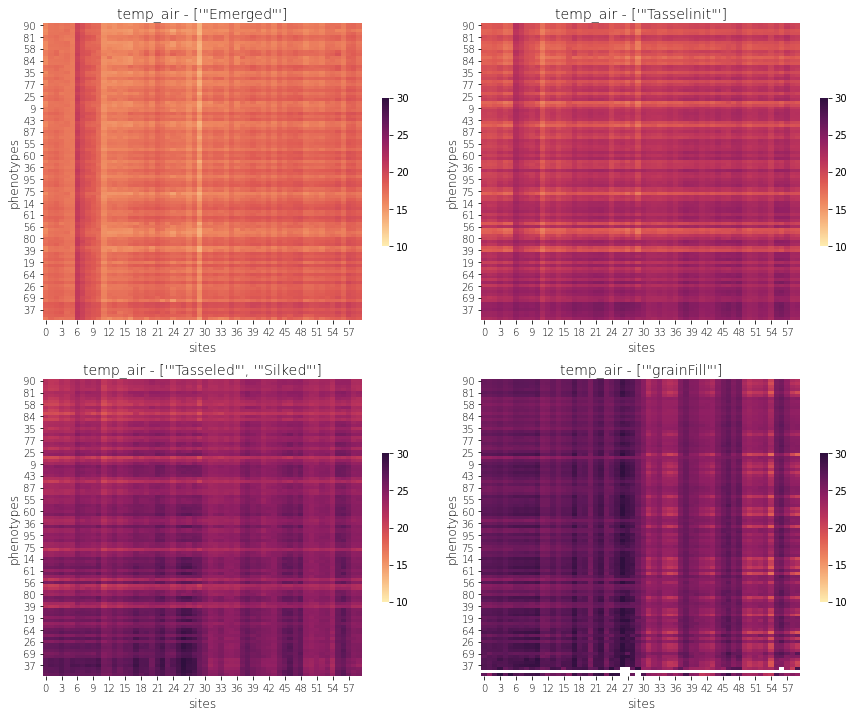

In [26]:
# Parameters
df = df_gseason_climate
sim = 'temp_air'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap=Matter_8.mpl_colormap,
                     cbar_kws={'shrink': 0.5},
                     vmin=10, vmax=30)
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

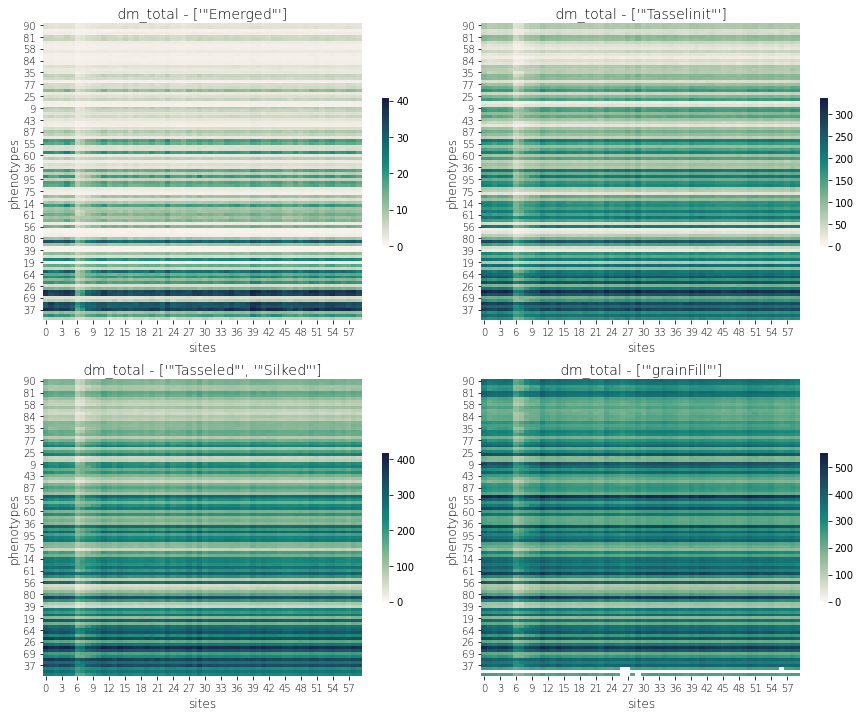

In [11]:
# Parameters
df = df_mass
sim = 'dm_total'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = Tempo_10.mpl_colormap,
                     cbar_kws={'shrink': 0.5}, vmin=0)
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

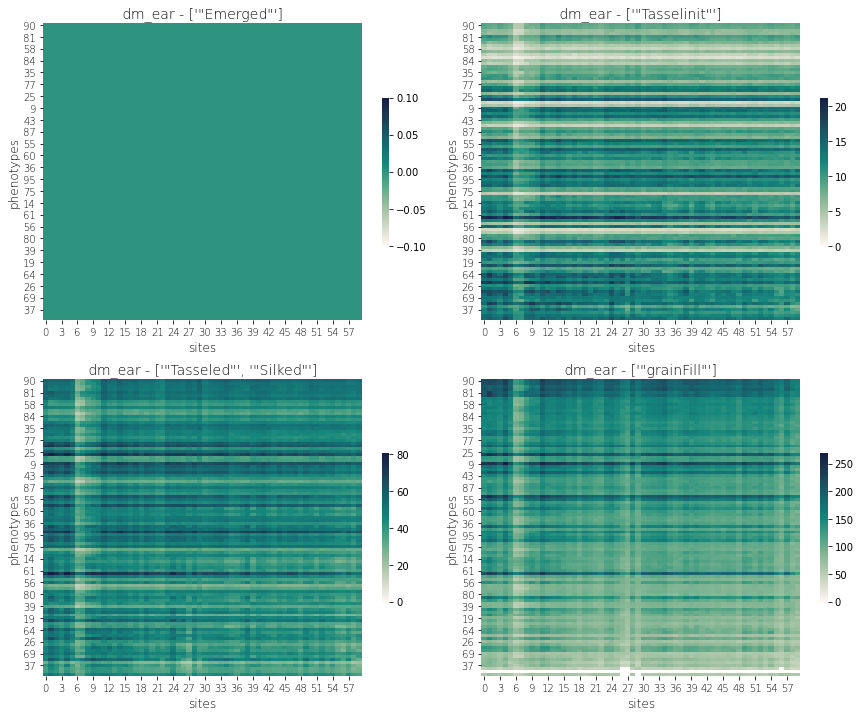

In [12]:
# Parameters
df = df_mass
sim = 'dm_ear'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = Tempo_10.mpl_colormap,
                     cbar_kws={'shrink': 0.5}, vmin=0)
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

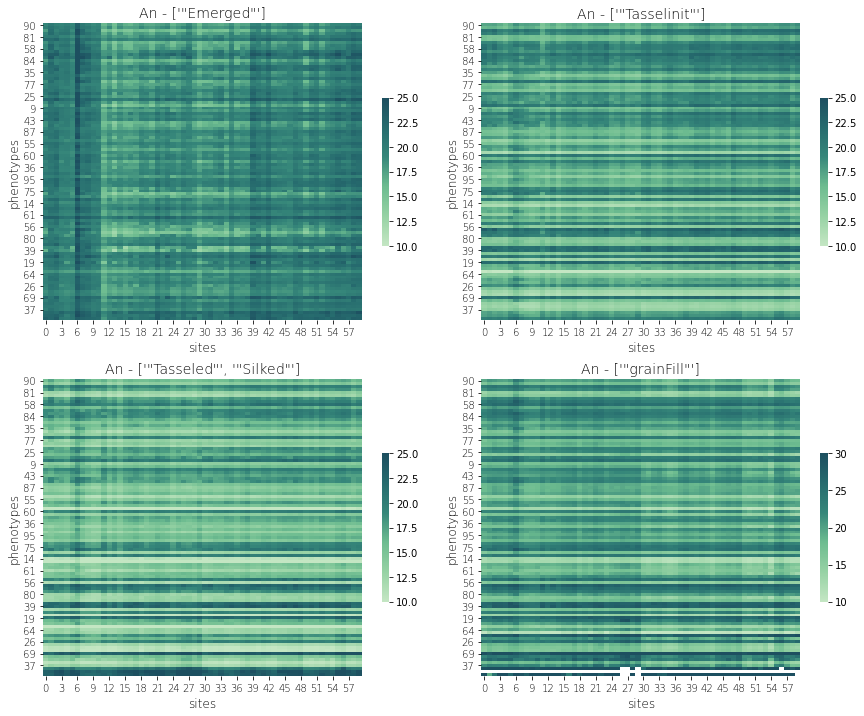

In [13]:
# Parameters
df = df_phys
sim = 'An'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]
vmins = [10,10,10,10]
vmaxs = [25,25,25,30]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = BluGrn_6.mpl_colormap,
                     vmin=vmins[index], vmax=vmaxs[index],
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

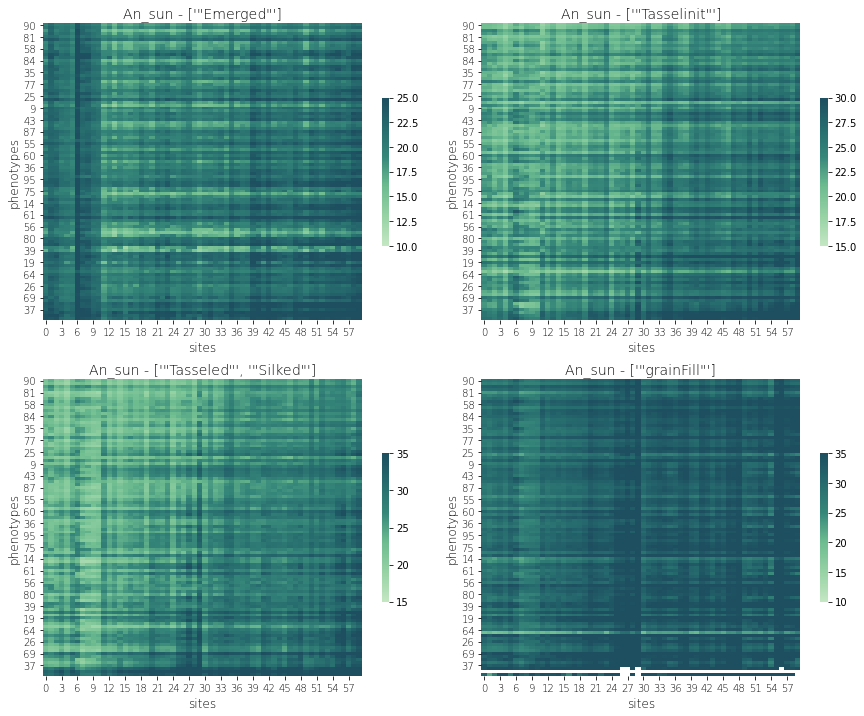

In [14]:
# Parameters
df = df_phys
sim = 'An_sun'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]
vmins = [10,15,15,10]
vmaxs = [25,30,35,35]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = BluGrn_6.mpl_colormap,
                     vmin=vmins[index], vmax=vmaxs[index],
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

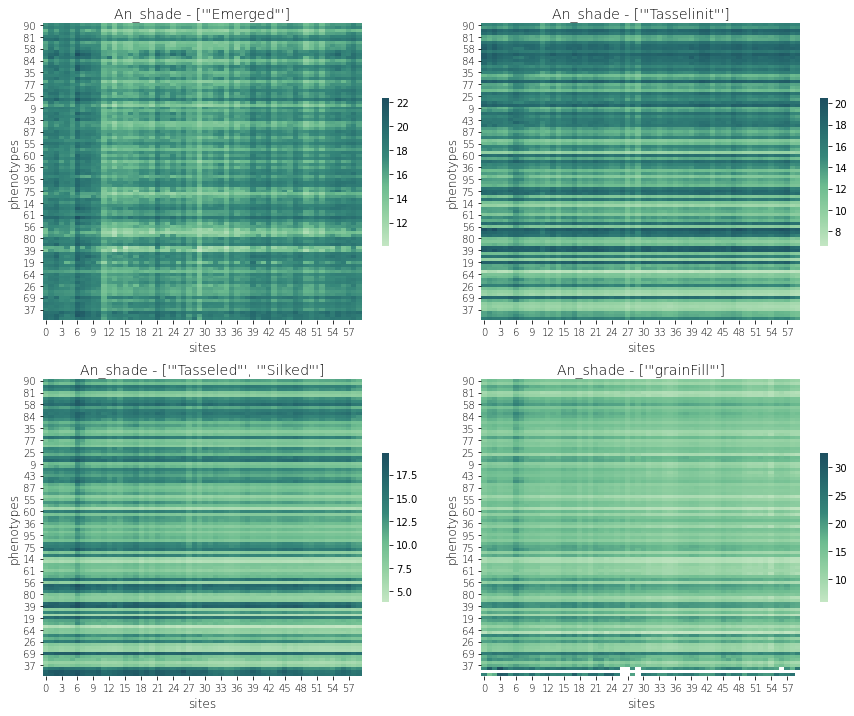

In [15]:
# Parameters
df = df_phys
sim = 'An_shade'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]
#vmins = [10,10,10,10]
#vmaxs = [25,25,20,30]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = BluGrn_6.mpl_colormap,
#                     vmin=vmins[index], vmax=vmaxs[index],
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

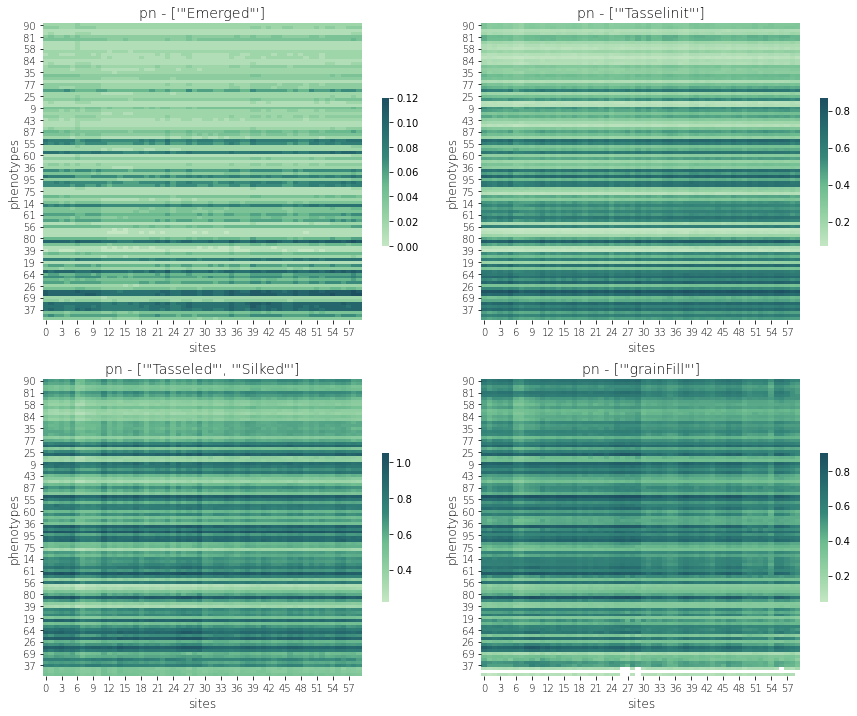

In [17]:
# Parameters
df = df_phys
sim = 'pn'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = BluGrn_6.mpl_colormap,
#                     vmin=0, vmax=1,
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

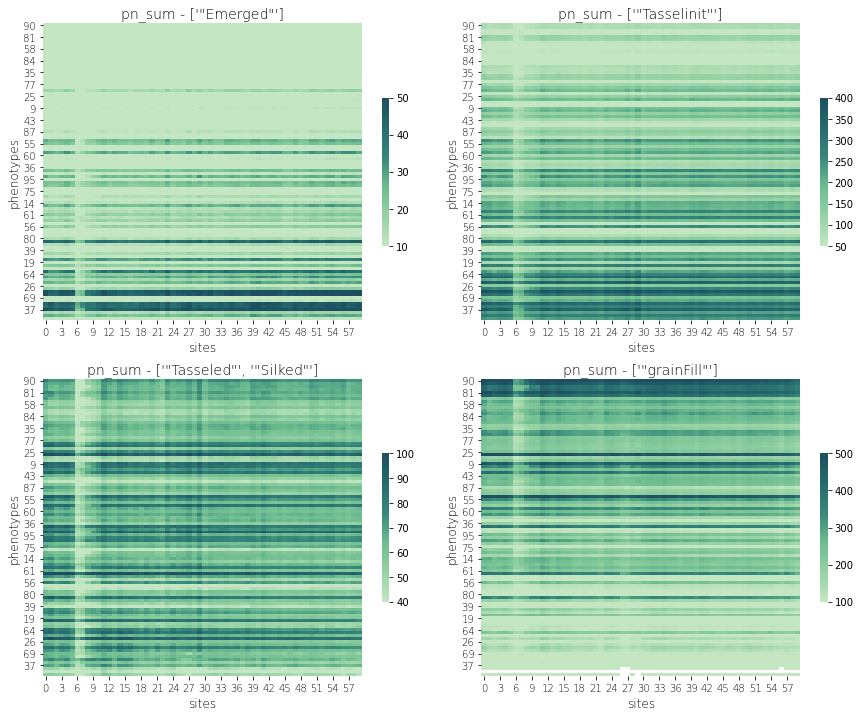

In [19]:
# Parameters
df = df_carbon
sim = 'pn_sum'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]
vmins = [10,50,40,100]
vmaxs = [50,400,100,500]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = BluGrn_6.mpl_colormap,
                     vmin=vmins[index], vmax=vmaxs[index],
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

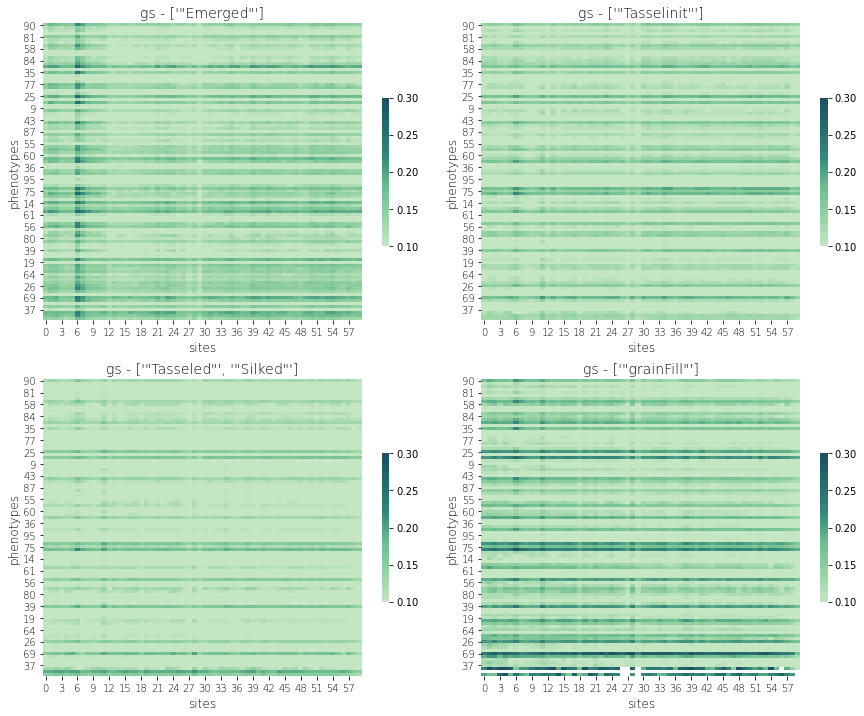

In [20]:
# Parameters
df = df_phys
sim = 'gs'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = BluGrn_6.mpl_colormap,
                     vmin=0.1, vmax=0.3,
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

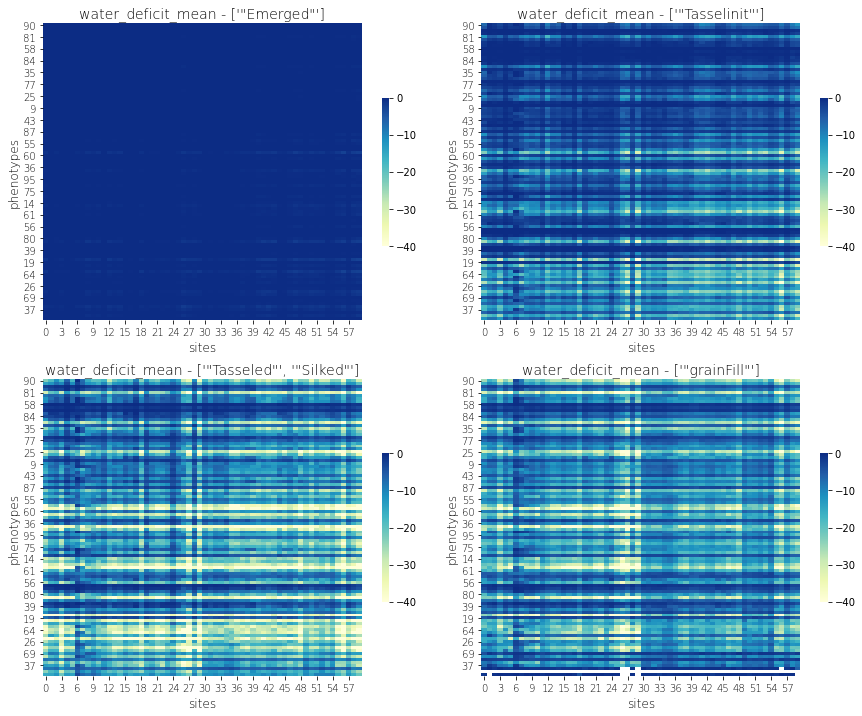

In [21]:
# Parameters
df = df_waterdeficit
sim = 'water_deficit_mean'
agg_method = 'mean'
phenostages = [['"Emerged"'], ['"Tasselinit"'], ['"Tasseled"', '"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(15,12))

for index in np.arange(4):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,2,index+1)
    im = sns.heatmap(df_sims, cmap = YlGnBu_8.mpl_colormap,
                     vmin=-40, vmax=0,
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)

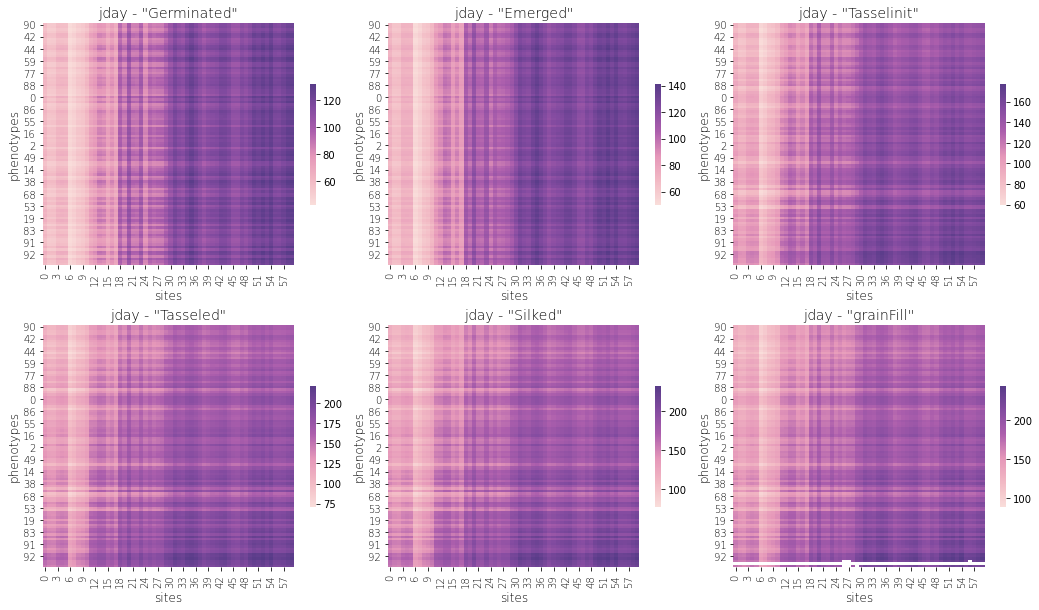

In [22]:
# Parameters
df = df_phenology
sim = 'jday'
agg_method = 'mean'
phenostages = [['"Germinated"'], ['"Emerged"'], ['"Tasselinit"'],
               ['"Tasseled"'], ['"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(18,10))

for index in np.arange(6):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,3,index+1)
    im = sns.heatmap(df_sims, cmap = PurpOr_6.mpl_colormap,
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage[0]}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0.25)

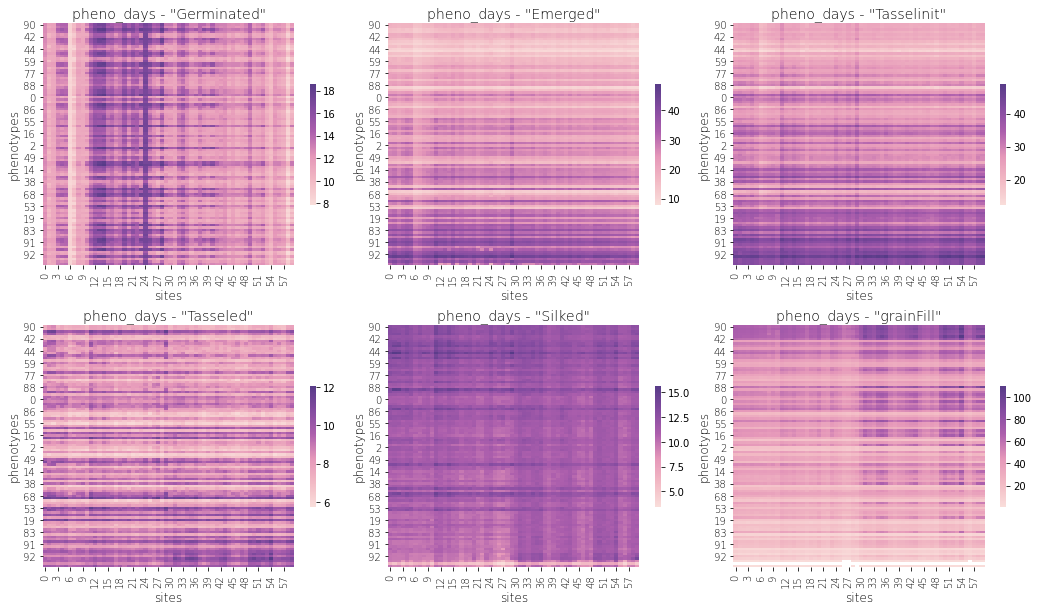

In [23]:
# Parameters
df = df_phenology
sim = 'pheno_days'
agg_method = 'mean'
phenostages = [['"Germinated"'], ['"Emerged"'], ['"Tasselinit"'],
               ['"Tasseled"'], ['"Silked"'], ['"grainFill"']]

# Visualization
fig = plt.figure(figsize=(18,10))

for index in np.arange(6):
    phenostage = phenostages[index]
    mx_sims = process_sims(df, sites, phenos, phenostage, sim, agg_method)
    df_sims = pd.DataFrame(mx_sims).reindex(phenos_ranked)

    ax = fig.add_subplot(2,3,index+1)
    im = sns.heatmap(df_sims, cmap = PurpOr_6.mpl_colormap,
                     cbar_kws={'shrink': 0.5})
    ax.set_title(f'{sim} - {phenostage[0]}', fontweight='light', size=14)
    ax.set_xlabel('sites', fontweight='light', size=12)
    ax.set_ylabel('phenotypes', fontweight='light', size=12)
    plt.xticks(fontweight='light', fontsize=10)
    plt.yticks(fontweight='light', fontsize=10, rotation=0)

fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0.25)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/heatmap_sims_pheno.png', format='png', dpi=800)

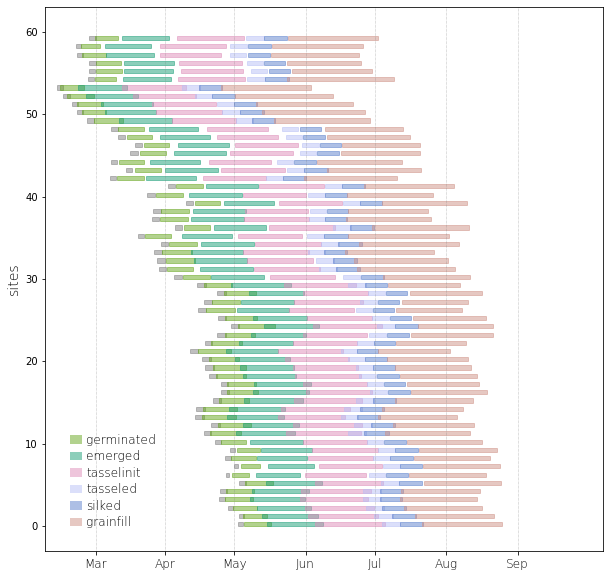

In [24]:

df_phenology_grouped = df_phenology.groupby(['site', 'pheno']).mean()

phenostages = [['"none"', '"Germinated"'],
               ['"Germinated"', '"Emerged"'],
               ['"Emerged"', '"Tasselinit"'],
               ['"Tasselinit"', '"Tasseled"'],
               ['"Tasseled"', '"Silked"'],
               ['"Silked"', '"grainFill"'],
               ['"grainFill"', '"Matured"']]
        
colors = ['grey', '#66a61e', '#1b9e77', 
          Mendl_4.mpl_colors[0],
          Mendl_4.mpl_colors[1],
          Mendl_4.mpl_colors[3],
          Mendl_4.mpl_colors[2]]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.plot([50,270],[0,60], alpha=0)
ax.set_ylabel('sites', fontweight='light', fontsize=14)

jday_months = [61, 91, 121, 152, 182, 213, 244]
ax.set_xticks(jday_months)
ax.set_xticklabels(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'],
                   fontweight='light', fontsize=12)

for jday_month in jday_months:
    ax.axvline(x=jday_month, color='grey', linewidth=0.5, linestyle=':')
    

legend_germinated = plt.Rectangle((50, 10), 5, 1, fc='#66a61e', alpha=0.5)
legend_emerged = plt.Rectangle((50, 8), 5, 1, fc='#1b9e77', alpha=0.5)
legend_tasselinit = plt.Rectangle((50, 6), 5, 1, fc=Mendl_4.mpl_colors[0], alpha=0.5)
legend_tasseled = plt.Rectangle((50, 4), 5, 1, fc=Mendl_4.mpl_colors[1], alpha=0.5)
legend_silked = plt.Rectangle((50, 2), 5, 1, fc=Mendl_4.mpl_colors[3], alpha=0.5)
legend_grainfill = plt.Rectangle((50, 0), 5, 1, fc=Mendl_4.mpl_colors[2], alpha=0.5)
plt.gca().add_patch(legend_germinated)
plt.gca().add_patch(legend_emerged)
plt.gca().add_patch(legend_tasselinit)
plt.gca().add_patch(legend_tasseled)
plt.gca().add_patch(legend_silked)
plt.gca().add_patch(legend_grainfill)
ax.text(57, 10, 'germinated', fontweight='light', size=12)
ax.text(57, 8, 'emerged', fontweight='light', size=12)
ax.text(57, 6, 'tasselinit', fontweight='light', size=12)
ax.text(57, 4, 'tasseled', fontweight='light', size=12)
ax.text(57, 2, 'silked', fontweight='light', size=12)
ax.text(57, 0, 'grainfill', fontweight='light', size=12)

for phenostage, color in zip(phenostages, colors):
    df_phenostage1 = df_phenology_grouped[df_phenology_grouped.index.get_level_values('pheno') == f'{phenostage[0]}']
    df_phenostage2 = df_phenology_grouped[df_phenology_grouped.index.get_level_values('pheno') == f'{phenostage[1]}']

    sites1 = list(df_phenostage1.index.get_level_values('site'))
    sites2 = list(df_phenostage2.index.get_level_values('site'))

    jdays_start = pd.DataFrame(np.empty(60), index=sites1, columns=['jday'])
    jdays_start[:] = np.nan
    jdays_start.loc[sites1, 'jday'] = list(df_phenostage1.jday.values)    
    
    jdays_end = pd.DataFrame(np.empty(60), index=sites1, columns=['jday'])
    jdays_end[:] = np.nan
    jdays_end.loc[sites2, 'jday'] = list(df_phenostage2.jday.values)

    jdays_len = [jdays_end.loc[site, 'jday'] - jdays_start.loc[site, 'jday'] for site in sites1]
    rankings = list(np.arange(60))
    rankings.reverse()
    
    for item, site in zip(rankings, sites1):
        rect = patches.Rectangle((jdays_start.loc[site, 'jday'], item), 
                                 jdays_len[item], 0.5,
                                 color=color,
                                 alpha=0.5)
        ax.add_patch(rect)

Text(1.5, 213, 'grain filling stage')

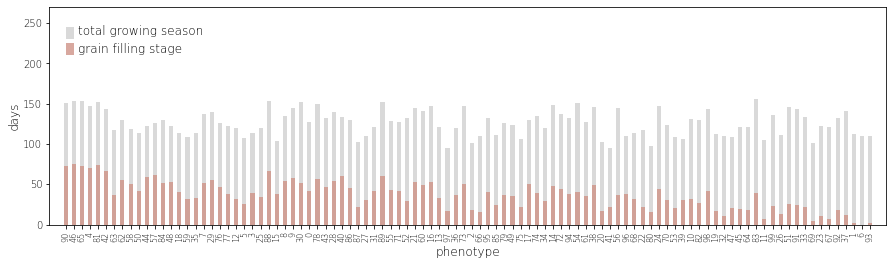

In [27]:
# Group output by phenotypes and pheno stages
df_pheno_grouped = df_phenology.groupby(['cvar', 'pheno']).mean().reset_index()
pheno_season_len = df_pheno_grouped.groupby('cvar').sum().pheno_days
pheno_season_len_sorted = [pheno_season_len[pheno] for pheno in phenos_ranked]

# Fetch pheno stage length of specified stage
pheno_stage = '"grainFill"'
pheno_days = []
for pheno in phenos_ranked:
    df_bool = df_pheno_grouped[
        (df_pheno_grouped.pheno == pheno_stage) & 
        (df_pheno_grouped.cvar == pheno)].pheno_days.shape[0]
    if df_bool == 0:
        pheno_days.append(np.nan)
    else:
        pheno_day = df_pheno_grouped[
            (df_pheno_grouped.pheno == pheno_stage) & 
            (df_pheno_grouped.cvar == pheno)].pheno_days.values.item()
        pheno_days.append(pheno_day)

# Turn top pheno list into string for plotting purposes
phenos_str = [str(pheno) for pheno in phenos_ranked]

# Visualization
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)

ax.bar(phenos_str, pheno_season_len_sorted, width=0.5, color='#d9d9d9')
ax.bar(phenos_str, pheno_days, width=0.5, color=Mendl_4.mpl_colors[2], alpha=0.8)

ax.set_ylabel('days', fontweight='light', size=12)
ax.set_xlabel('phenotype', fontweight='light', size=12)
plt.xticks(fontweight='light', fontsize=8, rotation=90)
plt.yticks(fontweight='light', fontsize=10, rotation=0)

ax.set_xlim(-2,101)
ax.set_ylim(0, 270)
season_len_legend = plt.Rectangle((0, 230), 1, 15, fc='#d9d9d9')
grainfill_legend = plt.Rectangle((0, 210), 1, 15, fc=Mendl_4.mpl_colors[2], alpha=0.8)
plt.gca().add_patch(season_len_legend)
plt.gca().add_patch(grainfill_legend)
ax.text(1.5, 235, 'total growing season', fontweight='light', size=12)
ax.text(1.5, 213, 'grain filling stage', fontweight='light', size=12)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_sims_grainfill.png', format='png', dpi=800)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

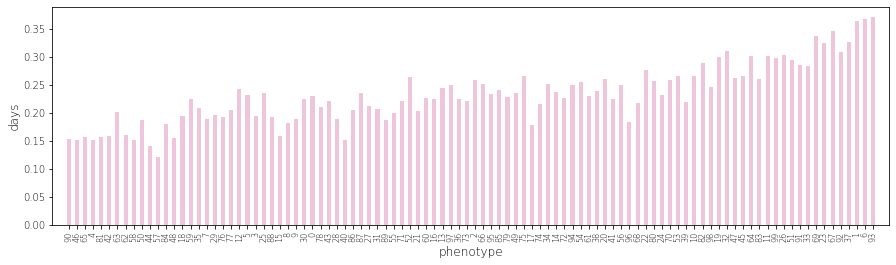

In [28]:
# Group output by phenotypes and pheno stages
df_pheno_grouped = df_phenology.groupby(['cvar', 'pheno']).mean().reset_index()
pheno_season_len = df_pheno_grouped.groupby('cvar').sum().pheno_days
pheno_season_len_sorted = [pheno_season_len[pheno] for pheno in phenos_ranked]

# Fetch pheno stage length of specified stage
#pheno_stage = '"Emerged"'
pheno_stage = '"Tasselinit"'
pheno_days = []
for pheno in phenos_ranked:
    df_bool = df_pheno_grouped[
        (df_pheno_grouped.pheno == pheno_stage) & 
        (df_pheno_grouped.cvar == pheno)].pheno_days.shape[0]
    if df_bool == 0:
        pheno_days.append(np.nan)
    else:
        pheno_day = df_pheno_grouped[
            (df_pheno_grouped.pheno == pheno_stage) & 
            (df_pheno_grouped.cvar == pheno)].pheno_days.values.item()
        pheno_days.append(pheno_day)

# Turn top pheno list into string for plotting purposes
phenos_str = [str(pheno) for pheno in phenos_ranked]

# Visualization
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)

#ax.bar(phenos_str, pheno_season_len_sorted, width=0.5, color='#d9d9d9')
pheno_frac = [pheno_day/pheno_season_len for pheno_day, pheno_season_len in zip(pheno_days, pheno_season_len_sorted)]
ax.bar(phenos_str, pheno_frac, width=0.5, color=Mendl_4.mpl_colors[0], alpha=0.5)

ax.set_xlim(-2,101)
ax.set_ylabel('days', fontweight='light', size=12)
ax.set_xlabel('phenotype', fontweight='light', size=12)
plt.xticks(fontweight='light', fontsize=8, rotation=90)
plt.yticks(fontweight='light', fontsize=10, rotation=0)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/bars_sims_tasselinit_frac.png', format='png', dpi=800)

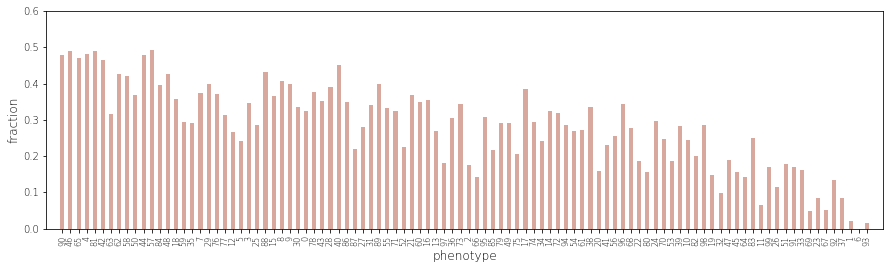

In [29]:
# Group output by phenotypes and pheno stages
df_pheno_grouped = df_phenology.groupby(['cvar', 'pheno']).mean().reset_index()
pheno_season_len = df_pheno_grouped.groupby('cvar').sum().pheno_days
pheno_season_len_sorted = [pheno_season_len[pheno] for pheno in phenos_ranked]

# Fetch pheno stage length of specified stage
pheno_stage = '"grainFill"'
pheno_days = []
for pheno in phenos_ranked:
    df_bool = df_pheno_grouped[
        (df_pheno_grouped.pheno == pheno_stage) & 
        (df_pheno_grouped.cvar == pheno)].pheno_days.shape[0]
    if df_bool == 0:
        pheno_days.append(np.nan)
    else:
        pheno_day = df_pheno_grouped[
            (df_pheno_grouped.pheno == pheno_stage) & 
            (df_pheno_grouped.cvar == pheno)].pheno_days.values.item()
        pheno_days.append(pheno_day)

# Turn top pheno list into string for plotting purposes
phenos_str = [str(pheno) for pheno in phenos_ranked]

# Visualization
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-2,101)
ax.set_ylim(0, 0.6)

#ax.bar(phenos_str, pheno_season_len_sorted, width=0.5, color='#d9d9d9')
pheno_frac = [pheno_day/pheno_season_len for pheno_day, pheno_season_len in zip(pheno_days, pheno_season_len_sorted)]
ax.bar(phenos_str, pheno_frac, width=0.5, color=Mendl_4.mpl_colors[2], alpha=0.8)

ax.set_ylabel('fraction', fontweight='light', size=12)
ax.set_xlabel('phenotype', fontweight='light', size=12)
plt.xticks(fontweight='light', fontsize=8, rotation=90)
plt.yticks(fontweight='light', fontsize=10, rotation=0)


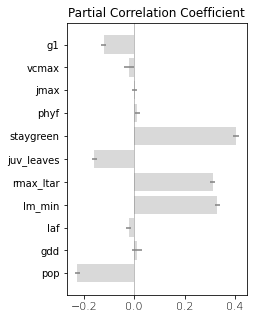

In [32]:
params_list = list(df_params.columns[:-1])
rs = []
ps = []
cis = []

for item in np.arange(11):
    param = params_list[item]
    select = list(np.arange(11))
    select.remove(item)
    params_sub = [params_list[item] for item in select]
    pcc = pg.partial_corr(df_all, x=param, y='dm_ear',
                          x_covar=params_sub)
    rs.append(pcc['r']['pearson'])
    ps.append(pcc['p-val']['pearson'])
    cis.append(pcc['CI95%']['pearson'])

errs = [np.round(np.abs(cis[item][0] - cis[item][1]),2) for item in np.arange(len(cis))]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.barh(list(reversed(params_list)), 
        list(reversed(rs)), color='#d9d9d9',
       xerr=errs, ecolor='grey')
ax.set_title('Partial Correlation Coefficient')

plt.axvline(x=0, color='grey', linewidth=0.5)
plt.xticks(fontsize=11, weight='light')
fig.subplots_adjust(left=0.3, right=0.8)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/pcc_vertical.png', format='png', dpi=800)

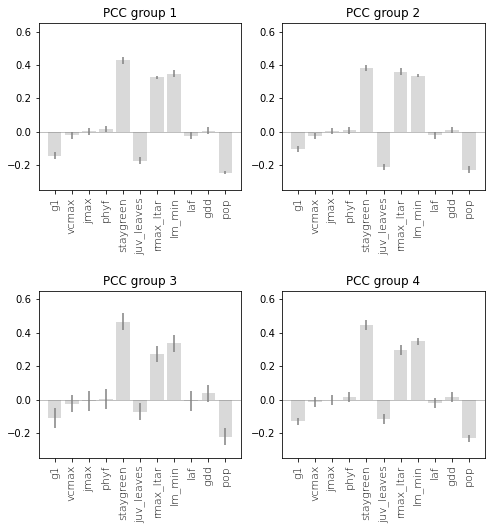

In [38]:
from sklearn.cluster import KMeans

#df_climate = df_all[['temp', 'temp_var', 'vpd', 'rh_var', 'precip', 'precip_var', 'solrad']]
df_climate = df_all[['temp', 'vpd', 'precip']]

kmeans_mod = KMeans(n_clusters=4)
kmeans_mod.fit(df_climate)
y_kmeans = kmeans_mod.predict(df_climate)

df_cluster = df_all.copy()
df_cluster['group'] = y_kmeans

df_km0 = df_cluster.query('group==0')
df_km1 = df_cluster.query('group==1')
df_km2 = df_cluster.query('group==2')
df_km3 = df_cluster.query('group==3')

df_kms = [df_km0, df_km1, df_km2, df_km3]
params_list = list(df_params.columns[:-1])

fig = plt.figure(figsize=(8,8))

for num in np.arange(len(df_kms)):
    rs = []
    ps = []
    cis = []
    ax = fig.add_subplot(2,2,num+1)
    
    for item in np.arange(11):
        param = params_list[item]
        select = list(np.arange(11))
        select.remove(item)
        params_sub = [params_list[item] for item in select]
        pcc = pg.partial_corr(df_kms[num], x=param, y='dm_ear',
                              x_covar=params_sub)
        rs.append(pcc['r']['pearson'])
        ps.append(pcc['p-val']['pearson'])
        cis.append(pcc['CI95%']['pearson'])

    errs = [np.round(np.abs(cis[item][0] - cis[item][1]),2) for item in np.arange(len(cis))]

    ax.bar(params_list, rs, color='#d9d9d9',
           yerr=errs, ecolor='grey')
    ax.set_title(f'PCC group {num+1}')
    ax.set_ylim(-0.35, 0.65)

    plt.axhline(y=0, color='grey', linewidth=0.5)
    plt.xticks(rotation=90, fontsize=11, weight='light')

fig.subplots_adjust(wspace=0.2, hspace=0.6)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/pcc_cspace.png', format='png', dpi=800)